In [1]:
#Importando os pacotes necessários

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

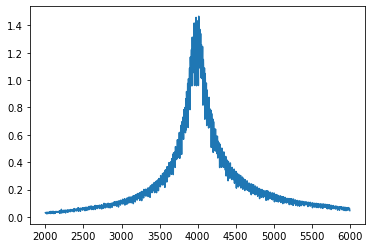

In [19]:
path = 'C:/Users/andre/Documents/MEGA/MEGAsync/Faculdade/ic_fotoacustica/metodologia/amplitude/dados_sft' #caminho da minha pasta
os.chdir(path)
magnitude = np.empty((0)) #Criando um array vazio para armazenar as magnitudes
fresson = 2000 #Criando um parâmetro de frequência  de ressonância esperado que será o centro do intervalo de 
               #frequência de modo que seja possível encontrar os picos desejados
frequencia =np.arange(2000, 6005, 5) #cria um array com frequências de 2000 a 6000 com passo de 5

for file in os.listdir(): #abre cada arquivo no meu diretório
    tensao=[] #Criando lista vazia para colocar valor por valor usando for
    tempo=[]
    for linha in open(file): #para cada linha do arquivo, realizo as operações a seguir:
        if linha == '\n': #adiciona um condicional para pular a linha em branco dos meus arquivos txt
            continue
        tempos,tensoes=linha.split('\t') #armazeno os valores da primeira coluna na variavel tempos, os da 2ª coluna na variavel tensoes
        tensao.append(tensoes) #cada valor da variavel tensoes é adicionado na lista vazia tensao pelo append=adicionar
        tempo.append(tempos) #cada valor da variavel tempos é adicionado na lista vazia tempo pelo append=adicionar
        
    #Primeiro são feitos tratamentos para a tensão

    tensao_float = [] #criando a lista vazia para adicionar os valores de tensão float 
    for i in range(2,len(tensao)): #Percorrendo as posições (ignorando as posições 0 e 1 que são as strings) para os valores de tensão
        y=tensao[i].replace('\n','') #pego o que está na lista e removo os \n
        tensao_float.append(y) #adiciono a uma nova lista

    #Esse algoritmo transforma os valores obtidos na forma string para a forma float
    for j in range(len(tensao_float)): #Percorrendo os elementos da lista de valores de tensão
        x=tensao_float[j].replace(",",'.') #pego o que está na lista com todos os valores e ja troco a virgula por ponto
        z=float(x) #converto cada valor que pegamos em float e armazeno em z
        tensao_float[j] = z #Para cada elemento da lista eu troco por um novo elemento de tipo float
        
    #Agora são feitos tratamentos para o tempo
    #Esse algoritmo transforma os valores obtidos na forma string para a forma float
    tempo_float=[] #criando a lista vazia para adicionar os valores de tempo float
    for l in range(2,len(tempo)): #Percorrendo as posições (ignorando as posições 0 e 1 que são as strings) para os valores de tempo
        u=float(tempo[l].replace(',','.')) #pego o que está na lista e troco as vírgulas por pontos e já converto pra float
        tempo_float.append(u) #adiciono a uma nova lista
 
 #-----------------------------------------------------------
    
    #Calculo da FFT

    fa = 1/(tempo_float[1] - tempo_float [0]) #resolução da coleta de dados
    N = len(tensao_float) #Número de coletas

    fft_freq = np.fft.fftfreq(N) #retorna os valores de frequência da fft
    mascara = fft_freq > 0       #pega somente as componentes positivas da minha fft

    fft = np.fft.fft(tensao_float) #calcula a fft do meu sinal fotoacústico
    fft_mod = np.abs(fft/N)        # Pega a parte positiva da minha fft e normaliza ela em relação ao número de dados da coleta
    eixo_freq = 1000*fa*fft_freq   # cria o eixo de frequência normalizado e em Hertz
    
    #Criando um Dataframe com os valores obtidos
    sinal_fft = pd.DataFrame({'Frequência': eixo_freq[mascara], 'Tensão': fft_mod[mascara]}) 
    freq = sinal_fft['Frequência']
    tens = sinal_fft['Tensão']
    
    #Encontrando o valor máximo de magnitude para cada intervalo
    v1 = fresson - 10 #pega a frequência de ressonância esperada e subtrai um valor
    v2 = fresson + 10 #pega a frequência de ressonância esperada e soma um valor
    filtro = freq.between(v1,v2) #armazena os valores de frequência booleanos do meu intervalo
    maximo = max(np.array(tens[filtro]))    #toma o valor máximo do intervalo obtido
    magnitude = np.append(magnitude,np.array([maximo]),axis=0) #adiciona o valor máximo ao array
    fresson +=5 #soma 5 a variável de modo que a próxima análise seja a frente
    
plt.plot(frequencia,magnitude) #plota os valores de magnitude pela frequência
plt.show()

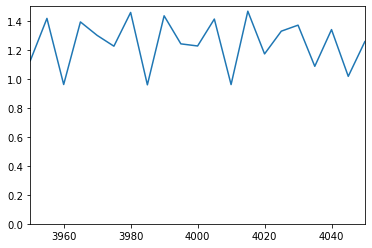

In [24]:
plt.axis([3950,4050,0,1.5])
plt.plot(frequencia,magnitude) #plota os valores de magnitude pela frequência
plt.show()

In [25]:
max(magnitude)

1.4665696088024478

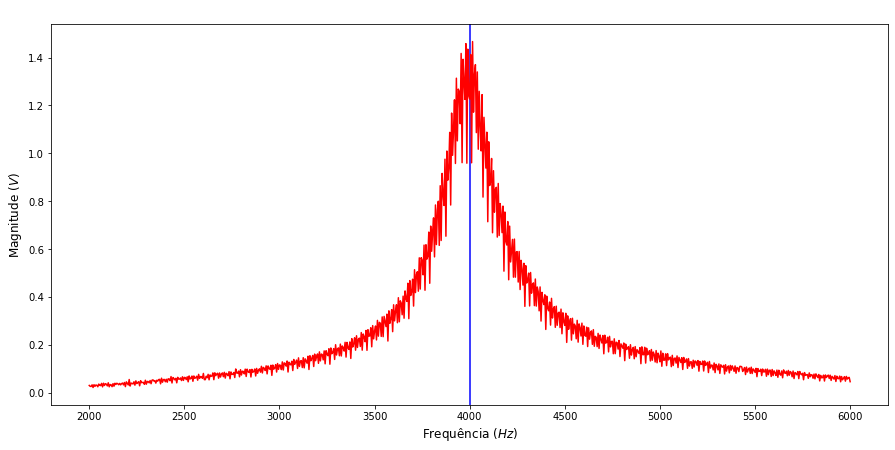

In [22]:
fig , ax = plt.subplots(figsize = (15,7))
ax.set_title('Sinal fotoacústico pela frequência de ressonância',fontsize=14,color='white')
ax.set_ylabel('Magnitude ($V$)',fontsize=12)#,color='white')
ax.set_xlabel('Frequência ($Hz$)', fontsize=12)#,color='white')
ax.axvline(x=4000,color='blue')
#ax.tick_params(axis='x',color='white',labelcolor='white',labelsize=14)
#ax.tick_params(axis='y',color='white',labelcolor='white',labelsize=14)
ax.plot(frequencia,magnitude,color='red')

#plt.savefig('magnitude.PNG')
plt.show()

In [31]:
sft = pd.DataFrame({'Frequência':frequencia,'Magnitude':magnitude})
sft.to('sinal_fotoacustico.csv')